<a href="https://colab.research.google.com/github/LeeHuiJong/-Deep_learning/blob/main/ch00_04_OpenCV%ED%99%9C%EC%9A%A9_haarcascade_%EA%B0%9D%EC%B2%B4%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch00.04. OpenCV 활용 - haarcascade 객체인식

---
* 날짜:
* 이름:

## 학습내용
    - 이미지에서 객체 인식하기
    - 동영상에서 객체 인식하기

## 학습자료


- [OpenCV 홈페이지](https://opencv.org/)

- [OpenCV-pythoin Documentation](https://opencv-python.readthedocs.io/en/latest/)

- [face-recognition](https://face-recognition.readthedocs.io/en/latest/readme.html#features)


## 개념정리
---
* 어려운 것 : 학습하는것
* 쉬운 것 : 학습된것을 가져와 쓰는 것
![](https://github.com/yebiny/Image-Segmentation-TF2/blob/main/imgs/seg_type.png?raw=true)



## face recognition를 이용한 얼굴탐지
---



#### **세팅**

```
! pip install face_recognition
```

In [1]:
! pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=347ee441fc1e3606b3034343283e86f497ab72b664218f2ebb20a0974a99a11b
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [2]:
import face_recognition as fr
import cv2
import matplotlib.pyplot as plt

#### **예측**

In [13]:
f_path = 'p3.png'
img = fr.load_image_file(f_path) # 전처리
pred = fr.face_locations(img) # 예측
print(pred), len(pred)

[(160, 613, 345, 428), (12, 408, 167, 253), (192, 291, 415, 68), (180, 737, 366, 551), (142, 1083, 365, 860), (0, 700, 150, 545)]


(None, 6)

#### **결과 시각화**

* return : (y1, x2, y2, x1)

160 613 345 428
12 408 167 253
192 291 415 68
180 737 366 551
142 1083 365 860
0 700 150 545


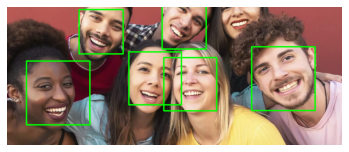

In [14]:
# 왼쪽 위 좌표 = 시작좌표 = (x1, y1)
# 오른쪽 아래 좌표 = 끝좌표 = (x2, y2)
for (y1, x2, y2, x1) in pred:
  print(y1, x2, y2, x1)
  # 사각형 그리기
  cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)
plt.imshow(img)
plt.axis('off')
plt.show()

## OpenCV를 이용한 얼굴탐지
---
https://opencv.org/releases/
### **Harr Feature Selection**

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FCGrST%2FbtqwozewRoL%2F97TeD7AXg37r84HSrpJ7n0%2Fimg.png)

[참고블로그](https://webnautes.tistory.com/1352)

### | 이미지에 적용하기

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

#### **세팅**

필요 파일
```
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'
```

파일 위치
```
- opencv
  - data
    - haarcascades
```

In [20]:
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'
f_path = 'p3.png'

In [21]:
# 분류기 객체 생성 (2개)
face_model = cv2.CascadeClassifier()
eyes_model = cv2.CascadeClassifier()

In [22]:
# 파라미터를 객체에 로드(face model)
# True면 값이 잘 들어간것
face_model.load(cv2.samples.findFile(face_cascade_name ))

True

In [23]:
# 파라미터를 객체에 로드(eyes model)
eyes_model.load(cv2.samples.findFile(eyes_cascade_name ))

True

#### **전처리**

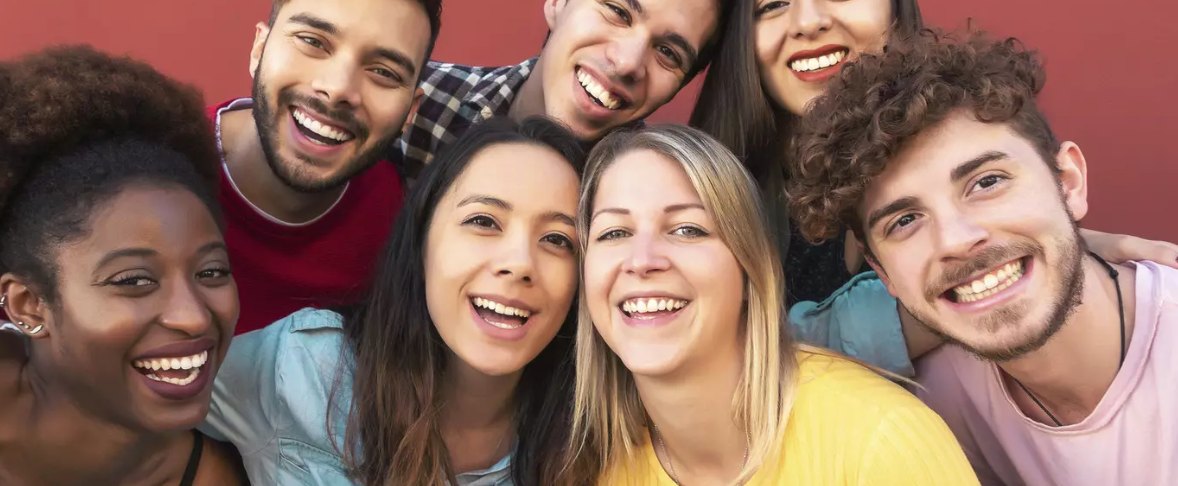

In [24]:
img = cv2.imread(f_path)
cv2_imshow(img)

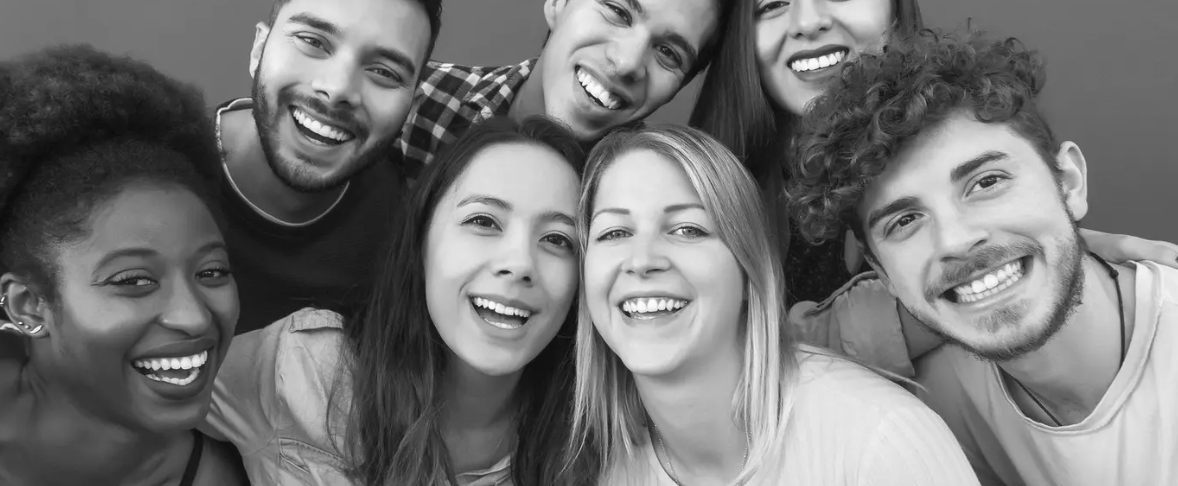

In [25]:
# 1채널(흑백) 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

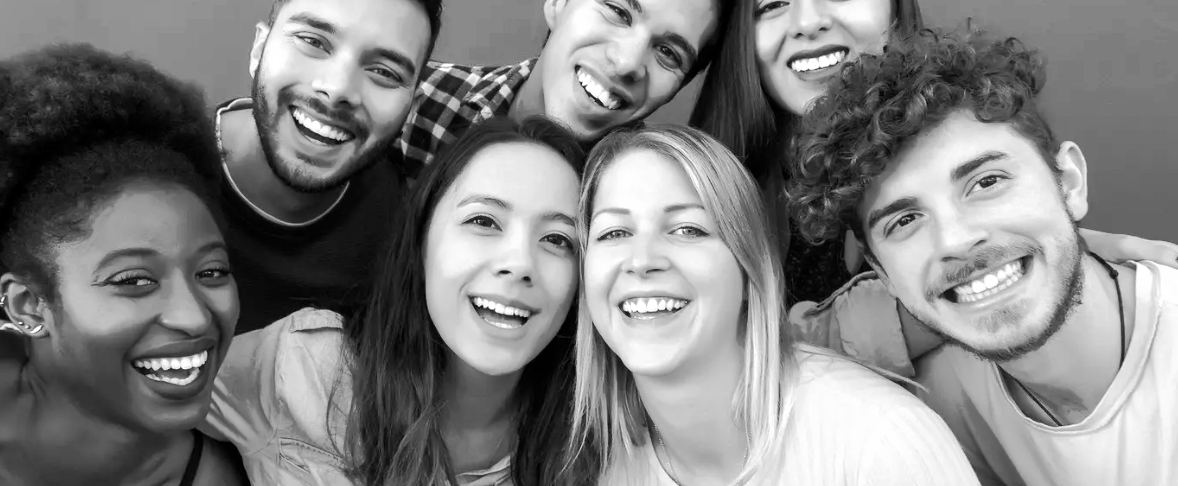

In [26]:
# 장점: 노이즈 제거. 
hist = cv2.equalizeHist(gray)
cv2_imshow(hist)

#### **예측**


In [27]:
pred = face_model.detectMultiScale(hist)
print(pred)

[[416 153 201 201]
 [559 160 183 183]
 [ 63 197 212 212]]


In [28]:
# result = (x1, y1, w, h)
# w, h 는 사이즈를 나타냄

In [29]:
x, y, w, h =pred[0]
print(x, y, w, h)

416 153 201 201


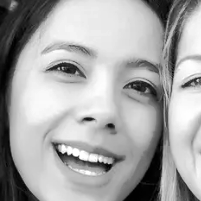

In [30]:
# 좌표 부분만 크롭
croped = hist[y:y+h, x:x+w] # 행:y, 열:x
cv2_imshow(croped)

In [31]:
# 눈을 찾는 모델
pred_eyes = eyes_model.detectMultiScale(croped)
print(pred_eyes)

[[117  66  43  43]
 [ 44  46  46  46]]


In [32]:
x, y, w, h = pred_eyes[0]
print(x, y, w, h)

117 66 43 43


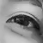

In [33]:
eye = croped[y:y+h, x:x+w] # 행:y, 열:x
cv2_imshow(eye)

#### **함수화**

In [64]:
def path2detect(path):
  # 전처리
  org_img = cv2.imread(path)
  img = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)
  img = cv2.equalizeHist(img)

  # 예측 및 시각화
  # 얼굴인식
  face_preds = face_model.detectMultiScale(img) # 얼굴인식
  for (x, y, w, h) in face_preds: # 얼굴마다
    print(f'face: {x}, {y}, {w}, {h}') # 좌표 출력
    cv2.rectangle(org_img, (x,y), (x+w, y+h), (0,255,0), 3) # 바운딩 박스 그리기
    # 눈인식을 위한 얼굴 크롭
    face = img[y:y+h, x:x+w]
    # 눈 인식
    eyes_preds = eyes_model.detectMultiScale(face)
    for (x2, y2, w2, h2) in eyes_preds: # 눈 마다
      print(f'eyes: {x2}, {y2}, {w2}, {h2}') # 좌표 출력
      center = (x + x2 + w2//2, y + y2 + h2//2) # 원본 이미지에 대한 좌표
      radius = int(round((w2+h2)*0.25)) # 반지름
      cv2.circle(org_img, center, radius, (0,255,255), 3) # 원그리기
  cv2_imshow(org_img)

* 함수사용

face: 56, 18, 52, 52


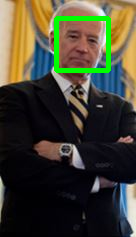

In [66]:
path2detect('p1.jpg')

### | 비디오에 적용하기

#### **세팅**


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

In [5]:
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'

In [6]:
# 분류기 객체 생성 (2개)
face_model = cv2.CascadeClassifier()
eyes_model = cv2.CascadeClassifier()

In [7]:
# 파라미터를 객체에 로드(face model)
# True면 값이 잘 들어간것
face_model.load(cv2.samples.findFile(face_cascade_name ))

True

In [8]:
# 파라미터를 객체에 로드(eyes model)
eyes_model.load(cv2.samples.findFile(eyes_cascade_name ))

True

#### **함수화**

In [9]:
import IPython
def frame2detect(frame):
  IPython.display.clear_output(wait=True) # 출력결과 매번 지움
  # 전처리
  img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  img = cv2.equalizeHist(img)

  # 예측 및 시각화
  # 얼굴인식
  face_preds = face_model.detectMultiScale(img) # 얼굴인식
  for (x, y, w, h) in face_preds: # 얼굴마다
    print(f'face: {x}, {y}, {w}, {h}') # 좌표 출력
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 3) # 바운딩 박스 그리기
    # 눈인식을 위한 얼굴 크롭
    face = img[y:y+h, x:x+w]
    # 눈 인식
    eyes_preds = eyes_model.detectMultiScale(face)
    for (x2, y2, w2, h2) in eyes_preds: # 눈 마다
      print(f'eyes: {x2}, {y2}, {w2}, {h2}') # 좌표 출력
      center = (x + x2 + w2//2, y + y2 + h2//2) # 원본 이미지에 대한 좌표
      radius = int(round((w2+h2)*0.25)) # 반지름
      cv2.circle(frame, center, radius, (0,255,255), 3) # 원그리기
  cv2_imshow(frame)

face: 41, 70, 55, 55


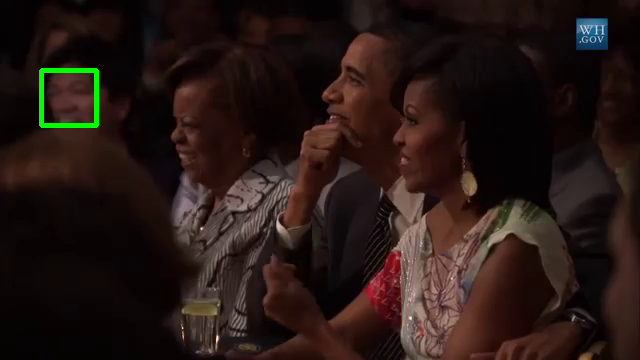

No Frame !


In [12]:
# 경로로부터 비디오 프레임 얻기
cap = cv2.VideoCapture('/content/short_hamilton_clip.mp4') # 비디오 캡쳐
while True:
  _,frame = cap.read() # 캡쳐로부터 비디오 프레임 얻기
  if frame is None: # 프레임 끝나면 종료
    print('No Frame !')
    break
  frame2detect(frame)

## 과제
---



### **과제 01**

[히스토그램](https://opencv-python.readthedocs.io/en/latest/doc/19.imageHistograms/imageHistograms.html)

[히스토그램 균일화](https://opencv-python.readthedocs.io/en/latest/doc/20.imageHistogramEqualization/imageHistogramEqualization.html)


### 히스토그램

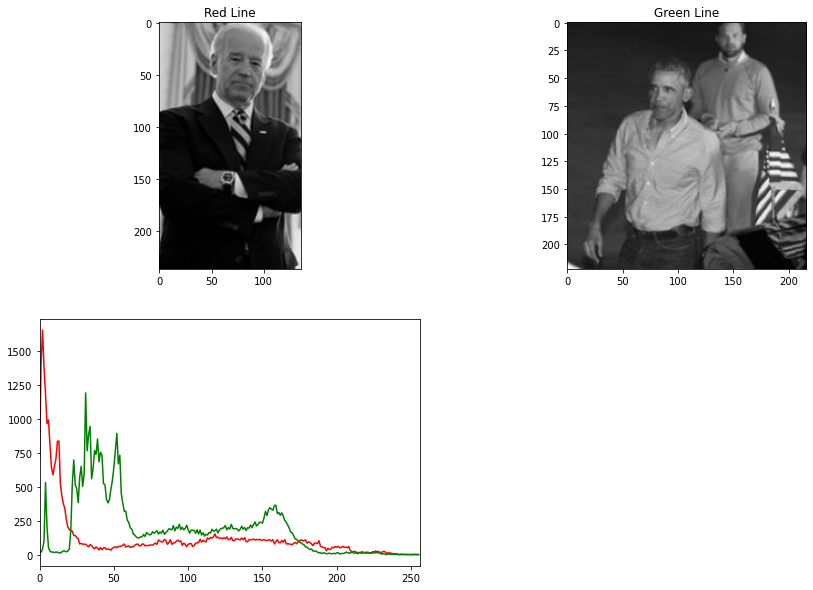

In [16]:
# 라이브러리 로드
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

# 이미지 로드
img1 = cv2.imread('p1.jpg',0)
img2 = cv2.imread('p2.jpg',0)

# 이미지 히스토그램
hist1 = cv2.calcHist([img1],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img2],[0],None,[256],[0,256])

# 사진과 그래프 출력
plt.figure(figsize = (15,10))
plt.subplot(221),plt.imshow(img1,'gray'),plt.title('Red Line')
plt.subplot(222),plt.imshow(img2,'gray'),plt.title('Green Line')
plt.subplot(223),plt.plot(hist1,color='r'),plt.plot(hist2,color='g')
plt.xlim([0,256])
plt.show()

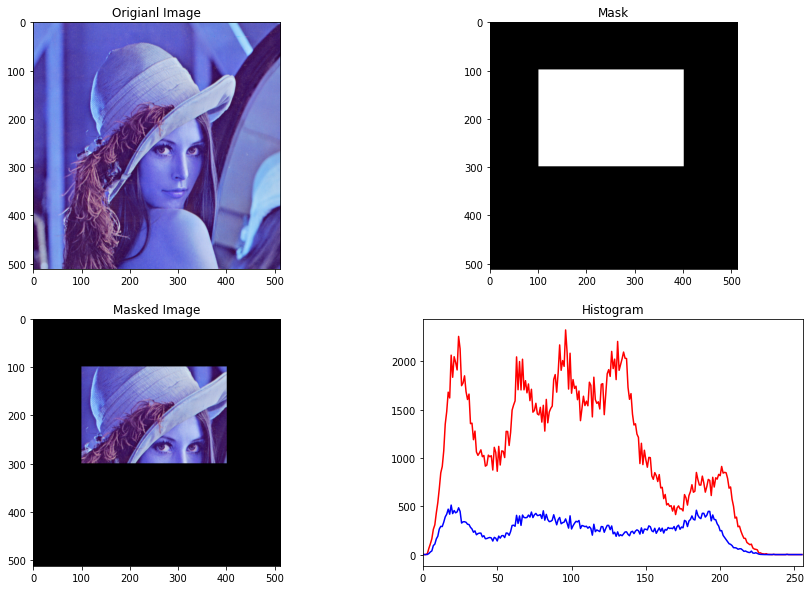

In [18]:
# 라이브러리 로드
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 로드
img = cv2.imread('Lenna.png');

# mask생성
mask = np.zeros(img.shape[:2],np.uint8)
mask[100:300,100:400] = 255

# 이미지에 mask가 적용된 결과
masked_img = cv2.bitwise_and(img,img,mask=mask)

# 원본 이미지의 히스토그램
hist_full = cv2.calcHist([img],[1],None,[256],[0,256])

# mask를 적용한 히스트로그램
hist_mask = cv2.calcHist([img],[1],mask,[256],[0,256])

plt.figure(figsize = (15,10))
plt.subplot(221),plt.imshow(img,'gray'),plt.title('Origianl Image')
plt.subplot(222),plt.imshow(mask,'gray'),plt.title('Mask')
plt.subplot(223),plt.imshow(masked_img,'gray'),plt.title('Masked Image')

# red는 원본이미지 히스토그램, blue는 mask적용된 히스토그램
plt.subplot(224),plt.title('Histogram')
plt.plot(hist_full,color='r'),plt.plot(hist_mask,color='b')
plt.xlim([0,256])

plt.show()

### 히스토그램 균일화

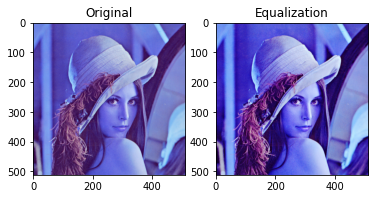

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('Lenna.png');

hist, bins = np.histogram(img.flatten(), 256,[0,256])

cdf = hist.cumsum()

# cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
# mask처리가 되면 Numpy 계산에서 제외가 됨
# 아래는 cdf array에서 값이 0인 부분을 mask처리함
cdf_m = np.ma.masked_equal(cdf,0)

#History Equalization 공식
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(img2),plt.title('Equalization')
plt.show()

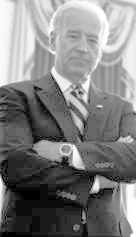

In [149]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


img = cv2.imread('p1.jpg')

# OpenCV의 Equaliztion함수
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.equalizeHist(gray)

cv2_imshow(img2)

In [150]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('p1.jpg');

# contrast limit가 2이고 title의 size는 8X8
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img2 = clahe.apply(img)

dst = np.hstack((img, img2))
cv2.imshow(dst)

error: ignored

### **과제 02**
```
- haarcascade_smile.xml  웃는 얼굴
- haarcascade_upperbody.xml  윗몸
```

### 세팅

In [47]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

In [48]:
smile_cascade_name = 'haarcascade_smile.xml'
upper_cascade_name = 'haarcascade_upperbody.xml'

In [49]:
# 분류기 객체 생성 (2개)
smile_model = cv2.CascadeClassifier()
upper_model = cv2.CascadeClassifier()

In [50]:
# 파라미터를 객체에 로드(smile model)
# True면 값이 잘 들어간것
smile_model.load(cv2.samples.findFile(smile_cascade_name ))

True

In [51]:
# 파라미터를 객체에 로드(upper model)
upper_model.load(cv2.samples.findFile(upper_cascade_name ))

True

### 함수

In [109]:
def path2detect(path):
  # 전처리
  org_img = cv2.imread(path)
  img = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)
  img = cv2.equalizeHist(img)

  # 예측 및 시각화
  # 얼굴인식
  smile_preds = smile_model.detectMultiScale(img, scaleFactor =1.8, minNeighbors=9) # 얼굴인식
  for (x, y, w, h) in smile_preds: # 얼굴마다
    cv2.rectangle(org_img, (x,y), (x+w, y+h), (0,255,0), 3) # 바운딩 박스 그리기

  cv2_imshow(org_img)

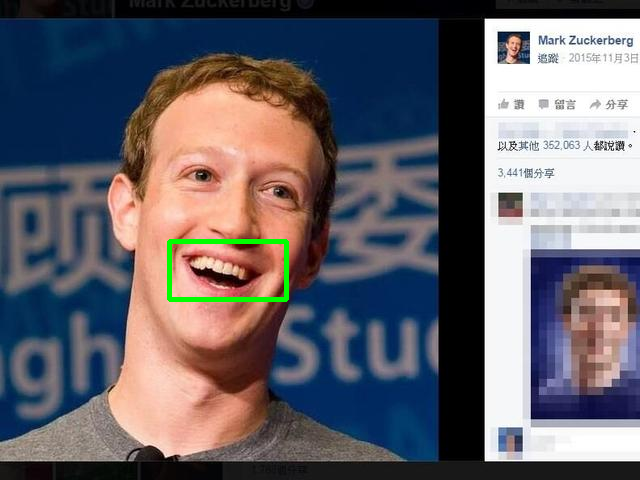

In [110]:
path2detect('sml.jpg')

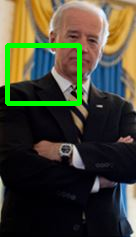

In [132]:
image = cv2.imread('p1.jpg')
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY);

upper_model = cv2.CascadeClassifier('haarcascade_upperbody.xml')
upper_preds = upper_model.detectMultiScale(image,
                                         scaleFactor = 1.1,
                                         minNeighbors = 1)
for (sx, sy, sw, sh) in upper_preds:
  cv2.rectangle(image, (sx,sy), (sx+sw, sy+sh), (0,255,0), 3)
cv2_imshow(image)